In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize as stats

In [ ]:
def combine(i, j, lattice, visited, cluster):

    N = lattice.shape[0]

    stack = [(i, j)]

    while stack:

        i, j = stack.pop()

        if i < 0 or i >= N or j < 0 or j >= N:
            continue

        if visited[i, j] == 1 or lattice[i, j] == 0:
            continue

        visited[i, j] = 1
        cluster.add((i, j))
        stack.append((i+1, j))
        stack.append((i-1, j))
        stack.append((i, j+1))
        stack.append((i, j-1))

In [ ]:
def find_clusters(lattice):

    N = lattice.shape[0]
    visited = np.zeros((N, N))
    clusters = []

    for i in range(N):

        for j in range(N):

            if lattice[i, j] == 1 and visited[i, j] == 0:
                cluster = set()
                combine(i, j, lattice, visited, cluster)
                clusters.append(cluster)

    return clusters

In [ ]:
def sim_perc(N, p, num_runs=10):

    results = []

    for _ in range(num_runs):

        lattice = np.random.rand(N, N) < p
        clusters = find_clusters(lattice)
        results.append(len(clusters))

    return np.mean(results)

In [ ]:
N = 100
ps = np.linspace(0, 1, 101)
num_runs = 10

#percolation for each p
results = [sim_perc(N, p, num_runs) for p in ps]

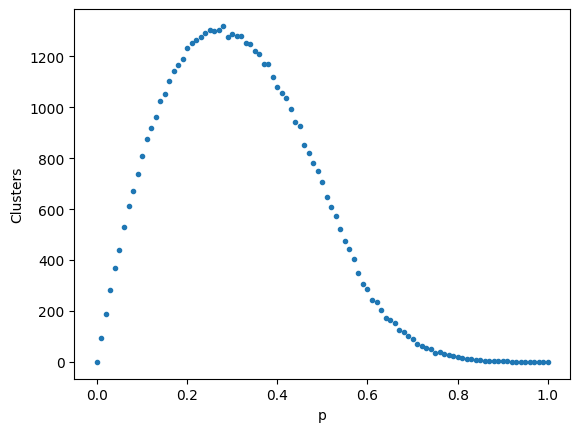

In [ ]:
plt.plot(ps, results, '.')
plt.xlabel('p')
plt.ylabel('Clusters')
plt.show()

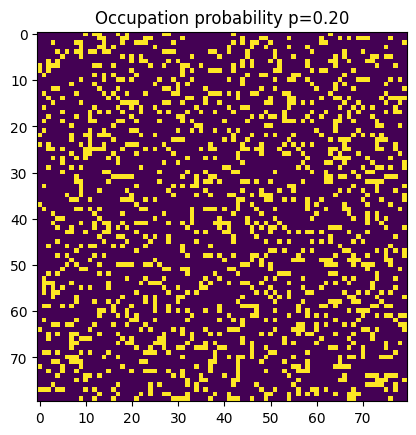

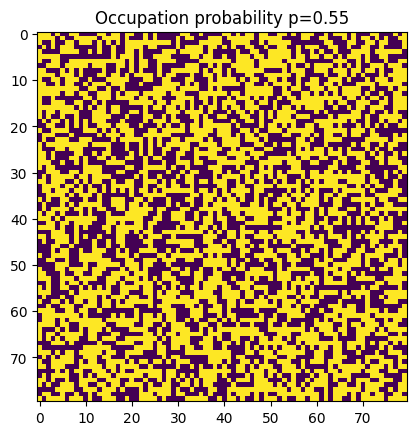

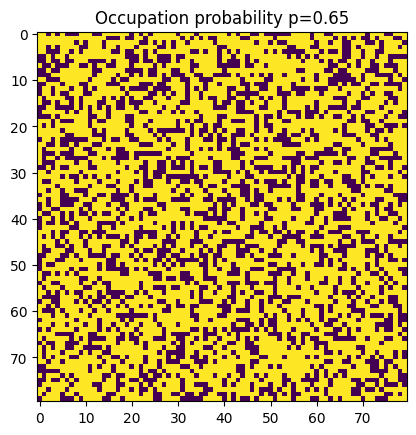

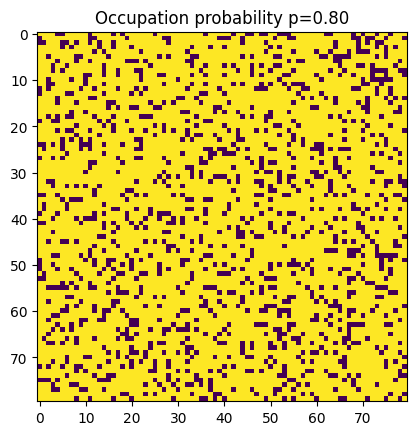

In [ ]:
#lattice at p = .2, .55, .65, .8
p_values = [0.2, 0.55, 0.65, 0.8]

for p in p_values:
    lattice = np.random.rand(N, N) < p
    plt.imshow(lattice)
    plt.title(f'Occupation probability p={p:.2f}')
    plt.show()

### yellow is occupied, purple is unoccupied

In [ ]:
def percolation(N, p):

    lattice = [[0 for i in range(N)] for j in range(N)]

    #fill randomly with probability p
    for i in range(N):
        for j in range(N):
            if random.random() < p:
                lattice[i][j] = 1

    clusters = [[0 for i in range(N)] for j in range(N)]

    current_cluster = 1

    stack = []

    for i in range(N):
        for j in range(N):
            if lattice[i][j] == 1 and clusters[i][j] == 0:
                stack.append((i, j))

                while stack:
                    x, y = stack.pop()

                    if clusters[x][y] == 0:

                        clusters[x][y] = current_cluster
                        if x > 0 and lattice[x-1][y] == 1 and clusters[x-1][y] == 0:
                            stack.append((x-1, y))
                        if x < N-1 and lattice[x+1][y] == 1 and clusters[x+1][y] == 0:
                            stack.append((x+1, y))
                        if y > 0 and lattice[x][y-1] == 1 and clusters[x][y-1] == 0:
                            stack.append((x, y-1))
                        if y < N-1 and lattice[x][y+1] == 1 and clusters[x][y+1] == 0:
                            stack.append((x, y+1))

                current_cluster += 1


    # check if spanning cluster
    span = False

    for i in range(N):
        if clusters[i][N-1] != 0:
            for j in range(N):
              if(clusters[j][0] != 0  and clusters[j][0] == clusters[i][N-1] and clusters[j][0] in clusters[N-1] and clusters[j][0] in clusters[0]):
                span = True
                break

        if span:
            break

    return span, clusters

In [ ]:
N_values = [5,10,15,20,30,50,80]

n_sim = 50

#storing critical probabilities and N values
pcs = []
Ns = []


for N in N_values:

    pc = []

    for i in range(n_sim):
        p_vals = np.linspace(0, 1, 50)

        for p in p_vals:
            a, clusters = percolation(N, p)
            p1 = np.asarray(clusters)

            if(a):
              pc.append((p1 > 0).sum()/(N**2))
              break

    pcs.append(np.average(pc))
    Ns.append(1/N)



#infinite limit a linear fit
fit = np.polyfit(Ns, pcs, 1)
pc_0 = fit[1]

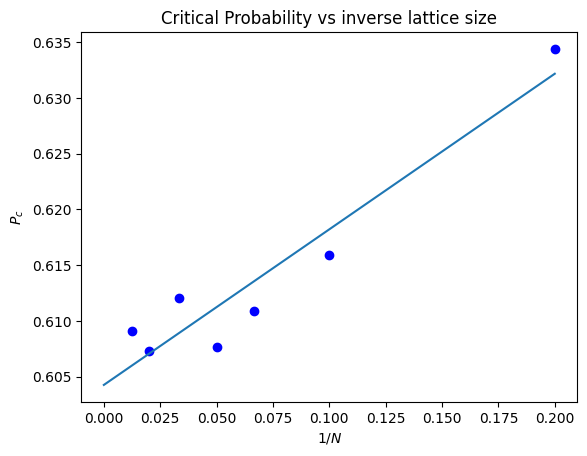

In [ ]:
plt.plot(Ns, pcs, 'bo')
plt.plot([0, max(Ns)], [pc_0, pc_0 + fit[0]*max(Ns)], '-')
plt.xlabel('$1/N$')
plt.ylabel('$P_c$')
plt.title('Critical Probability vs inverse lattice size')
plt.show()

## The extrapolation line shows that the $p_c(0)≈0.6$ as expected (infinite $N$ means $1/N$ goes to 0)

----------------------------------------

In [ ]:
def percolation2(N, p):

    lattice = [[0 for i in range(N)] for j in range(N)]

    #fill randomly with probability p
    for i in range(N):
        for j in range(N):
            if (random.random() < p).any():
                lattice[i][j] = 1

    clusters = [[0 for i in range(N)] for j in range(N)]

    current_cluster = 1

    stack = []

    for i in range(N):
        for j in range(N):
            if lattice[i][j] == 1 and clusters[i][j] == 0:
                stack.append((i, j))

                while stack:
                    x, y = stack.pop()

                    if clusters[x][y] == 0:

                        clusters[x][y] = current_cluster
                        if x > 0 and lattice[x-1][y] == 1 and clusters[x-1][y] == 0:
                            stack.append((x-1, y))
                        if x < N-1 and lattice[x+1][y] == 1 and clusters[x+1][y] == 0:
                            stack.append((x+1, y))
                        if y > 0 and lattice[x][y-1] == 1 and clusters[x][y-1] == 0:
                            stack.append((x, y-1))
                        if y < N-1 and lattice[x][y+1] == 1 and clusters[x][y+1] == 0:
                            stack.append((x, y+1))

                current_cluster += 1

    # check if spanning cluster
    span = False
    spanval = -1

    for i in range(N):
        if clusters[i][N-1] != 0:
            for j in range(N):
              if(clusters[j][0] != 0  and clusters[j][0] == clusters[i][N-1] and clusters[j][0] in clusters[N-1] and clusters[j][0] in clusters[0]):
                span = True
                spanval = clusters[j][0]
                break

        if span:
            break

    return span, clusters, spanval

In [ ]:
p_values = np.linspace(0, 1, 50)
ps = []
ps2 = []

for i in range(50):

  for p in p_values:

    a, clusters = percolation(100,p)
    p1 = np.asarray(clusters)
    if(a):
      ps2.append(p)
      ps.append((p1 > 0).sum()/(100*100))
      break

print(np.average(ps), np.average(ps2))
pc = np.average(ps)

In [ ]:
pc

0.606286

In [ ]:
F = []

probability = np.linspace(pc, .7, 50)

for p in probability:

  avg = []

  for i in range(50):

    spans, clusters, spanvalue = percolation2(100, p)
    p1 = np.asarray(clusters)
    total = (p1 > 0).sum()
    inspan = (p1 == spanvalue).sum()
    avg.append(inspan/total)

  F.append(np.average(avg))

In [ ]:
def ansatz(x, F0, B):

    return F0 * (x - pc)**B

# fit the results to the power-law ansatz
popt, pcov = stats.curve_fit(ansatz, probability, F, p0=[1, 1])

<ipython-input-97-00c26a9de6fd>:3: RuntimeWarning: divide by zero encountered in power
  return F0 * (x - pc)**B


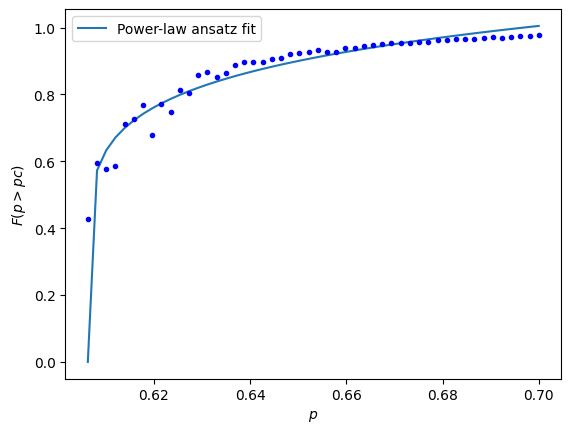

<ipython-input-97-00c26a9de6fd>:3: RuntimeWarning: divide by zero encountered in power
  return F0 * (x - pc)**B


In [ ]:
plt.plot(probability, ansatz(probability, *popt), label='Power-law ansatz fit')
plt.plot(probability, F, 'b.')
plt.xlabel('$p$')
plt.ylabel('$F(p > pc)$')
plt.legend()
plt.show()

popt, pcov = stats.curve_fit(ansatz, probability, F, p0=[1, 1])

In [ ]:
print('F0 =', popt[0])
print('beta =', popt[1])

F0 = 1.4150248925267122
beta = 0.1445091368841457


### which approximately aligns with expection